<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/sklearn%E4%B8%80%E8%88%AC%E6%B5%81%E7%A8%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U scikit-learn
!pip install sklearn

In [2]:
!pip install --upgrade sklearn


In [3]:
import sklearn
sklearn.__version__

'1.0.2'

# **scikit**-learn 一般流程


sklearn机器学习的一般流程包括:
* 数据的获取
* ~~特征的提取~~
* ~~特征的选择~~
* 数据预处理
* 模型的训练
* 模型的评估
* 模型的优化
* 模型持久化

## 一, 数据的获取

可以导入内部数据集, 计算生成的数据集, 网络上的数据集, 文件中的数据集等.

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

In [5]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

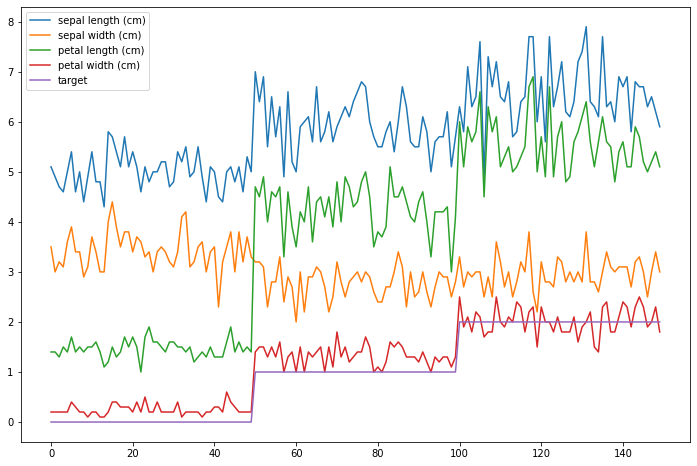

In [8]:
# 利用dataframe 做简单的可视化分析
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.plot(figsize=(12,8))


In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 二, 数据预处理

预处理数据包括: 数据的标准化, 数据的归一化, 数据的二值化, 非线性转换, 数据特征编码, 处理缺失值等

In [10]:
from sklearn import preprocessing
# 实例化接口
scaler = preprocessing.MinMaxScaler() # MinMaxScaler 将样本特征值线性缩放到0,1之间
scaler.fit(iris.data) # 先fit
data = scaler.transform(iris.data) # 再transform. 也可以二合一写fit_transform 
target = iris.target

In [11]:
data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## 三, 模型的训练

根据问题特点选择适当的估计器estimate模型:分类(SVC, KNN, LR, NaiveBayes,...) 回归(Lasso, ElasicNet, SVR, ...) 聚类(KMeans,...)降维(PCA,...)

我们当前的问题时根据特征预测鸢尾花的类型, 属于代标签的分类问题, 并且samples个数为150个小于100k, 所以根据sklearn使用地图我们选择Linear SVC 模型进行分类.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=1/3)
len(X_train), len(X_test)

(100, 50)

In [13]:
y_test

array([0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 2])

In [14]:
from sklearn import svm  # 导入支持向量机模块
clf = svm.SVC(kernel='linear', C=1, probability=True) # 实例化向量机分类器
clf.fit(X_train,y_train) #用训练集数据fit模型
clf.predict(X_test) - y_test

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [15]:
# 查看参数
clf.get_params()
# clf.C

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
clf.predict_proba(X_test) # 预测为对应结果的概率

array([[9.56175368e-01, 2.76050084e-02, 1.62196231e-02],
       [2.58511927e-02, 3.81228628e-01, 5.92920179e-01],
       [1.79823086e-02, 1.31694069e-01, 8.50323622e-01],
       [1.45682196e-02, 7.07810001e-01, 2.77621780e-01],
       [9.72955132e-01, 1.54276595e-02, 1.16172084e-02],
       [4.26728541e-03, 9.36251946e-04, 9.94796463e-01],
       [9.64536340e-01, 2.27497218e-02, 1.27139385e-02],
       [9.45494226e-01, 3.97671292e-02, 1.47386452e-02],
       [2.57614191e-02, 7.74688581e-01, 1.99550000e-01],
       [9.86340162e-01, 6.33855777e-03, 7.32128056e-03],
       [1.09880182e-02, 1.03057736e-02, 9.78706208e-01],
       [1.44023166e-02, 8.36711107e-01, 1.48886576e-01],
       [9.64098925e-01, 2.39830947e-02, 1.19179800e-02],
       [4.71464665e-03, 1.19456920e-03, 9.94090784e-01],
       [1.71594823e-02, 5.34653312e-01, 4.48187205e-01],
       [2.47721208e-02, 9.64448628e-01, 1.07792510e-02],
       [9.76093257e-01, 1.34821518e-02, 1.04245909e-02],
       [9.80691786e-01, 8.96377

In [17]:
# 查看模型的得分
clf.score(X_test,y_test) # 这里得到的时accuracy rate
# 对不同类型的模型有不同的评分算法, 由score方法内部所定义

0.96

## 四, 模型的评估

模型的评估和模型的优化相关功能在sklearn.model_selection模块中. 

除了使用estimator的score函数简单粗略地评估模型的质量外, 
在sklearn.metrics模块针对不同的问题类型提供了各种评估指标并且可以创建用户自定义的评估指标.

可以采用交叉验证方法评估模型的泛化能力, 能够有效避免过度拟合.

K折交叉验证(K=10)示意图
K-fold cross validation



In [18]:
# 分类模型评分报告
from sklearn.metrics import classification_report
print(classification_report(target,clf.predict(data),target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [19]:
# from sklearn import metrics
# metrics.
# from sklearn import model_selection
# model_selection.

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,data,target,cv=5) # 采用5折交叉验证
print(scores)

# 平均得分和95%置信区间
print("Accuracy: %0.2f(+/-%0.2f)"%(scores.mean(),scores.std()*2))

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Accuracy: 0.97(+/-0.04)


## 五, 模型的优化

优化模型的方法包括网格搜索法,随机搜索法, 模型待定交叉验证,信息准则优化.

网格搜索法在指定的超参数空间中对每一种可能的情况进行交叉验证评分并选出最好的超参数组合.



In [21]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV

# 估计器
svc = svm.SVC()

# 超参数空间
param_grid = [{'C':[0.1,1,10,100,1000],'kernel':['linear']}, # 五种可能
              {'C':[0.1,1,10,100,1000],'gamma':[0.001,0.01],'kernel':['rbf']}] # 10种可能, total=15种可能

# 打分函数
scoring = 'accuracy'

# 指定采样方法
clf = GridSearchCV(svc,param_grid,scoring=scoring,cv=10)
clf.fit(data,target) # 得到的clf是一个优化了的分类器

clf.predict(data) #用优化了的分类器进行分类
print(clf.get_params()) # 查看全部参数
print(clf.best_params_) # 查看最优参数

clf.best_score_

{'cv': 10, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'param_grid': [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01], 'kernel': ['rbf']}], 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'accuracy', 'verbose': 0}
{'C': 1000, 'kernel': 'linear'}


0.9733333333333334

## 六, 模型持久化

可以使用python内置的pickle模块或将训练好模型保存到磁盘或字符串, 以便将来直接使用, 而不需要重复训练. 对于sklearn,使用joblib会更加有效,但是只能保存到磁盘而不能保存成字符串.

In [22]:
import pickle
s = pickle.dumps(clf) #保存模型成字符串
clf2 = pickle.loads(s) #从字符串加载模型
clf2.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# from sklearn.externals import joblib
import joblib
joblib.dump(clf,'filename.pkl') #保存模型到文件
clf3 = joblib.load('filename.pkl') #加载模型

In [24]:
clf3.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 特征工程

## 数据的获取

sklearn 数据集一览


| 类型         | 获取方式    |
| --------     | :-----:   | 
| 自带的小数据集|sklearn.datasets.load_...|
| 在线下在的数据集| sklearn.datasets.fetch_...| 
| 计算机生成的数据集| sklearn.datasets.make_ | 
| svmlight/libsvm格式的数据集| sklearn.datasets.load_svmlight_file(...) | 
| mldata.org在线下载数据集| sklearn.datasets.fetch_mldata(...)| 

自带的小数据集:

* 鸢尾花数据集: load_iris()可用于分类和聚类
* 乳腺癌数据集: load_breast_cancer()可用于分类
* 手写数字数据集: load_digits() 可用于分类
* 糖尿病数据集: load_diabetes() 可用于分类
* 波士顿房价数据集: load_boston() 可用于回归
* 体能训练数据集: load_linnerud() 可用于回归
* 图像数据集: load_sample_image(name)

计算机生成的数据集:

* make_blobs 可用于聚类和分类
* make_classification 可用于分类
* make_circles 可用于分类
* make_moons 可用于分类
* make_multilabel_classification 可用于多标签分类
* make_regression 可用于回归

## 一, 自带的小数据集

In [32]:
#导入数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris() # 鸢尾花 for classification
digits = datasets.load_digits() # 手写数字识别 for classification

# boston = datasets.load_boston() # 波士顿房价 for regression

iris['data'] 
iris['target']

iris['feature_names']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 二, 计算机生成的数据集

使用计算机生成数据集的有点:

* 非常灵活: 可以控制样本数量, 特征数量, 类别数量,问题难易程度等等...
* 无穷无尽: 
可以在学习其他机器学习模块如tensorflow时使用sklearn的数据集

X.shape (200, 2)
labels {0, 1, 2}


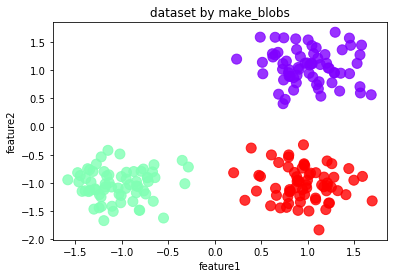

In [38]:
# 生成数据 make_blobs
import pandas as pd 
%matplotlib inline 
import matplotlib
from sklearn.datasets import make_blobs

center=[[1,1],[-1,-1],[1,-1]]
cluster_std=0.3
X, labels = make_blobs(n_samples=200,centers=center,n_features=2,
                       cluster_std=cluster_std,random_state=0)

print('X.shape',X.shape)
print("labels",set(labels))

# np.c_ :concatenation
df = pd.DataFrame(np.c_[X,labels],columns=['feature1','feature2','labels'])
df['labels'] = df['labels'].astype('i2')

#mycolormap = matplotlib.colors.ListedColormap(['red','cyan','magenta'],N=3)
#matplotlib常用colormap: 'jet', 'rainbow','hsv'
df.plot.scatter('feature1','feature2',s=100,
                c=list(df['labels']),cmap='rainbow',colorbar=False,
                alpha=0.8,title='dataset by make_blobs')

In [37]:
#生成数据集 make_classification
